# Handwritten Character Recognition

##### Importing all the necessary modules

In [1]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
from keras.models import Sequential
from keras.layers import Dense,Flatten,Conv2D,MaxPool2D,Dropout
from keras.optimizers import SGD,Adam
from keras.callbacks import ReduceLROnPlateau,EarlyStopping
from keras.utils import to_categorical
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

##### Reading data from csv file

In [2]:
data=pd.read_csv(r"E:\A_Z Handwritten Data.csv").astype('float32')

##### Splitting data into images and their labels

In [3]:
X=data.drop('0',axis=1)
y=data['0']

##### Splitting data into training and test sets

In [10]:
train_x,test_x,train_y,test_y=train_test_split(X,y,test_size=0.2)
train_x=np.reshape(train_x.values,(train_x.shape[0],28,28))
test_x=np.reshape(test_x.values,(test_x.shape[0],28,28))
print("Train data shape: ",train_x.shape)
print("Test data shape: ",test_x.shape)

Train data shape:  (297960, 28, 28)
Test data shape:  (74490, 28, 28)


##### Creating a dictionary to map integer values with the characters

In [6]:
word_dict = {0:'A',1:'B',2:'C',3:'D',4:'E',5:'F',6:'G',7:'H',8:'I',9:'J',10:'K',11:'L',12:'M',13:'N',14:'O',15:'P',16:'Q',17:'R',18:'S',19:'T',20:'U',21:'V',22:'W',23:'X', 24:'Y',25:'Z'}

##### Shuffling the data and displaying random threshold images of 9 alphabets

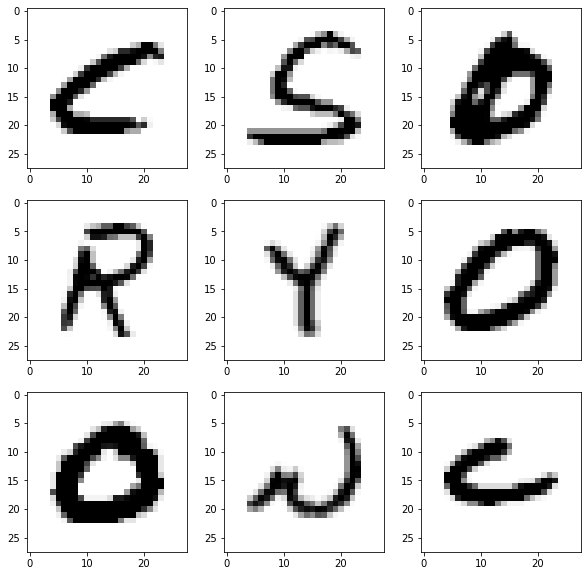

In [11]:
#shuffling data
shuff=shuffle(train_x[:100])

fig,ax=plt.subplots(3,3,figsize=(10,10))
axes=ax.flatten()

for i in range(9):
    _,shu=cv2.threshold(shuff[i],30,200,cv2.THRESH_BINARY)
    axes[i].imshow(np.reshape(shuff[i],(28,28)),cmap="Greys")
plt.show()    

##### reshaping training and test data

In [12]:
#reshaping training and test data
train_X=train_x.reshape(train_x.shape[0],train_x.shape[1],train_x.shape[2],1)
print("New shape of train data: ", train_X.shape)

test_X = test_x.reshape(test_x.shape[0], test_x.shape[1], test_x.shape[2],1)
print("New shape of train data: ", test_X.shape)

New shape of train data:  (297960, 28, 28, 1)
New shape of train data:  (74490, 28, 28, 1)


##### converting single float values to categorical values

In [13]:
train_y_1=to_categorical(train_y,num_classes=26,dtype='int')
print("New shape of train labels: ",train_y_1.shape)

test_y_1=to_categorical(test_y,num_classes=26,dtype='int')
print("New shape of test labels: ",test_y_1.shape)

New shape of train labels:  (297960, 26)
New shape of test labels:  (74490, 26)


##### Creating a CNN model

In [15]:
#creating model
model=Sequential()

model.add(Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(28,28,1)))
model.add(MaxPool2D(pool_size=(2,2),strides=2))

model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu',padding='same'))
model.add(MaxPool2D(pool_size=(2,2),strides=2))

model.add(Conv2D(filters=128,kernel_size=(3,3),activation='relu',padding='valid'))
model.add(MaxPool2D(pool_size=(2,2),strides=2))

model.add(Flatten())

model.add(Dense(64,activation='relu'))
model.add(Dense(128,activation='relu'))

model.add(Dense(26,activation='softmax'))

##### compiling and fitting model

In [16]:
model.compile(optimizer=Adam(learning_rate=0.001),loss='categorical_crossentropy',metrics=['accuracy'])
history=model.fit(train_X,train_y_1,epochs=1,validation_data=(test_X,test_y_1))


9312/9312 [==============================] - 413s 44ms/step - loss: 0.1579 - accuracy: 0.9568 - val_loss: 0.1013 - val_accuracy: 0.9728


### Model summary

In [17]:
model.summary()
model.save(r'model_char_recog.h5')

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 4, 4, 128)         73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 2, 2, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 512)              

#### Validation and training accuracy & losses

In [18]:
print("validation accuracy: ",history.history['val_accuracy'])
print("training accuracy: ",history.history['accuracy'])
print("validation loss: ",history.history['val_loss'])
print("training loss: ",history.history['loss'])

validation accuracy:  [0.9728419780731201]
training accuracy:  [0.9568063020706177]
validation loss:  [0.1013118103146553]
training loss:  [0.15786786377429962]


### Predictions on Test data

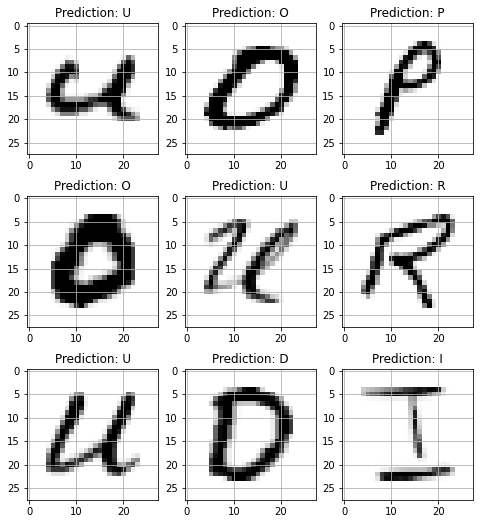

In [19]:
#prediction on test data
fig,axes=plt.subplots(3,3,figsize=(8,9))
axes=axes.flatten()

for i,ax in enumerate(axes):
    img=np.reshape(test_X[i],(28,28))
    ax.imshow(img,cmap="Greys")
    
    pred=word_dict[np.argmax(test_y_1[i])]
    ax.set_title("Prediction: "+pred)
    ax.grid()

### Making Predictions

In [12]:
img = cv2.imread(r'C:\Users\Excel Computer\Desktop\b_1.jpeg')
img_copy = img.copy()

img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.resize(img, (400,440))

In [13]:
img_copy = cv2.GaussianBlur(img_copy, (7,7), 0)
img_gray = cv2.cvtColor(img_copy, cv2.COLOR_BGR2GRAY)
_, img_thresh = cv2.threshold(img_gray, 100, 255, cv2.THRESH_BINARY_INV)

img_final = cv2.resize(img_thresh, (28,28))
img_final =np.reshape(img_final, (1,28,28,1))

In [15]:
from keras.models import load_model
model=load_model(r'model_char_recog.h5')
img_pred = word_dict[np.argmax(model.predict(img_final))]
cv2.putText(img, "Prediction: " + img_pred, (20,410), cv2.FONT_HERSHEY_DUPLEX, 1.3, color = (255,0,30))
cv2.imshow('Handwritten Character Recognition', img)
while (1):
    k = cv2.waitKey(1) & 0xFF
    if k == 27:
        break
cv2.destroyAllWindows()